# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>


In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

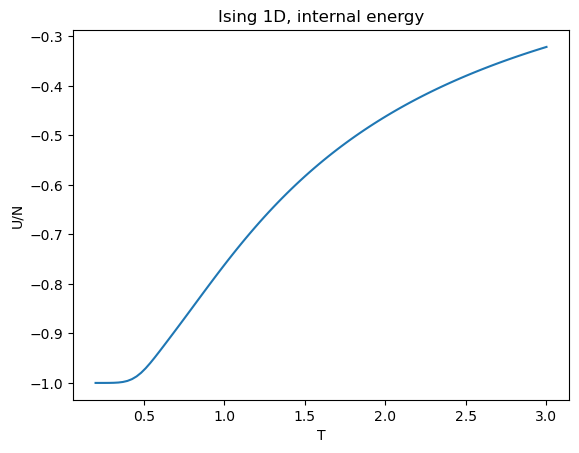

In [1]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e)
plt.title('Ising 1D, internal energy')
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

- the **Heat Capacity** (with $h=0$):

$$
C(N,T) = \frac{\partial U(N,T)}{\partial T}
= \frac{\partial \beta}{\partial T}\frac{\partial U}{\partial \beta}
= -k_B\beta^2 \frac{\partial}{\partial \beta} \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z} \right] = \\
= -k_B\beta^2 \left[ -\sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \sum_{\{ s_i \}} H \exp \left( -\beta H\right)\frac{\partial Z^{-1}}{\partial \beta} \right] = \\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} + \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]\frac{1}{Z}\frac{\partial Z}{\partial \beta} \right\} =\\
= k_B\beta^2 \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\} =
k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$

$$
\frac{C(N,T)}{N} = \frac{1}{N}\frac{\partial U(N,T)}{\partial T} =\\
\underset{h=0}= 
k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}
- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

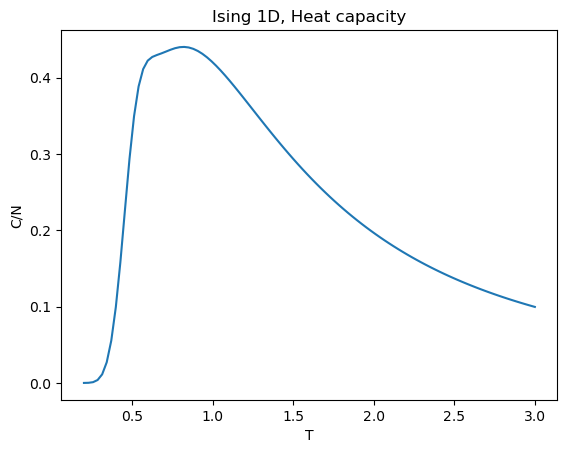

In [2]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat)
plt.title('Ising 1D, Heat capacity')
plt.xlabel('T')
plt.ylabel('C/N')
plt.show()

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = -\frac{\partial A}{\partial h} = k_B T \frac{\partial \ln Z}{\partial h} =
\frac{1}{\beta} \frac{1}{Z}\frac{\partial}{\partial h}\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

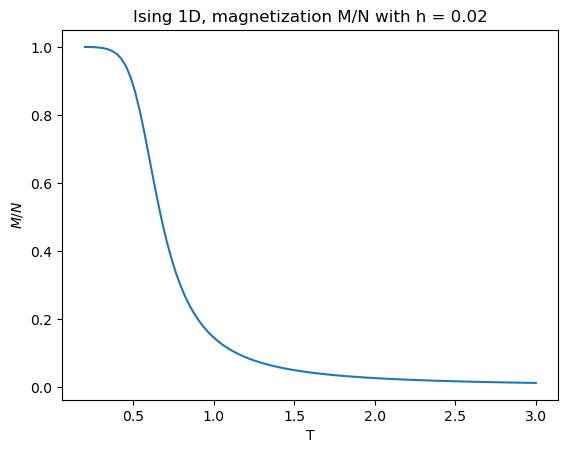

In [3]:
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M)
plt.title('Ising 1D, magnetization M/N with h = 0.02')
plt.xlabel('T')
plt.ylabel('$M/N$')
plt.show()

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) = \frac{\partial M}{\partial h} = 
\frac{\partial}{\partial h}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\\
= \beta\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right]^2 \frac{\exp \left( -\beta H\right)}{Z}
-\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z}
\frac{1}{Z}\frac{\partial Z}{\partial h} = 
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle - \left\langle \sum_{i=1,N}s_i \right\rangle^2 \right] = \\
\underset{h=0}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right] = \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

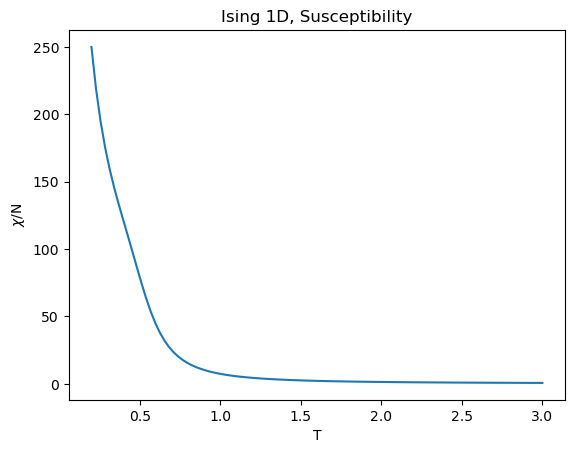

In [4]:
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
plt.plot(T, X)
plt.title('Ising 1D, Susceptibility')
plt.xlabel('T')
plt.ylabel('$\chi$/N')
plt.show()

### Exercise 06.1

Complete the C++ code to simulate 1D Ising model (It is available on the Ariel web site of this Laboratory) with 
- the Metropolis sampling algorithm and
- the Gibbs sampling algorithm

to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T)/N = \langle H/N \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T)/N = \langle H/N \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ (one every 0.1) for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- <span style="color:red">Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties</span> obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

### <span style="color:red"> Note</span>
In the code every changed line or group of lines of code has been noted by writing "//Changed", and every addition by writing "//Added" to make it easier to distinguish them.

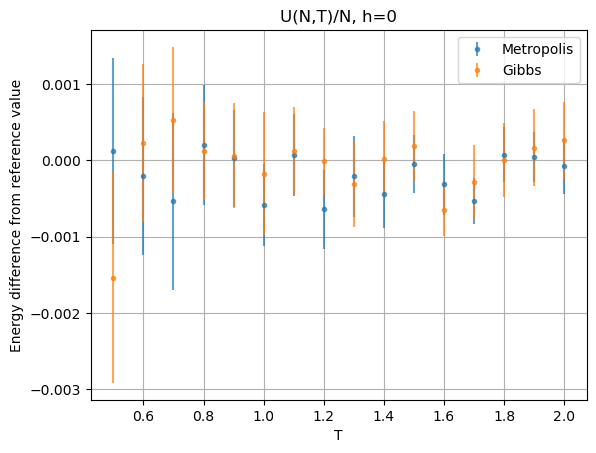

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Read the data from the file
data_e_m = np.loadtxt("final.ene.metro")
data_e_g = np.loadtxt("final.ene.gibbs")

# Extract the columns
temp_e_m  = data_e_m [:,0]
value_e_m  = data_e_m [:,1]
error_e_m  = data_e_m [:,2]
temp_e_g  = data_e_g [:,0]
value_e_g  = data_e_g [:,1]
error_e_g  = data_e_g [:,2]

# Define a function to subtract from the energy array
J = 1
n = 50
def energy(temp):
    return -J*np.tanh(J/temp)*(1+np.tanh(J/temp)**(n-2))/(1+np.tanh(J/temp)**n)

value_e_m_minus = value_e_m - energy(temp_e_m)
value_e_g_minus = value_e_g - energy(temp_e_g)

# Plot the energy as a function of temperature with error bars
plt.errorbar(temp_e_m, value_e_m_minus, yerr=error_e_m, label="Metropolis", alpha=0.7, fmt = '.')
plt.errorbar(temp_e_g, value_e_g_minus, yerr=error_e_g, label="Gibbs", alpha=0.7, fmt = '.')

# Set the axis labels and title
plt.xlabel("T")
plt.ylabel("Energy difference from reference value")
plt.legend()
plt.grid(True)
plt.title("U(N,T)/N, h=0")

# Show the plot
plt.show()


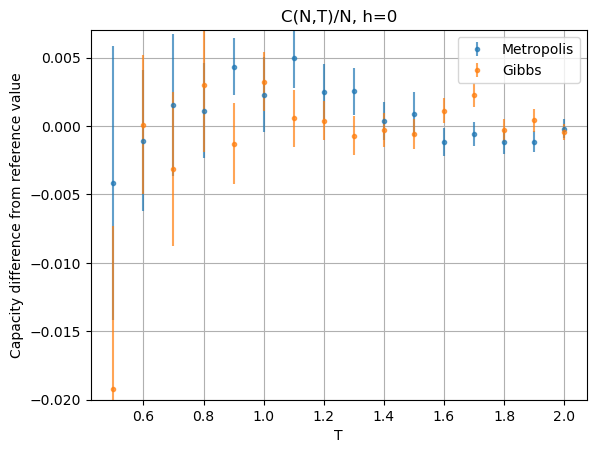

In [6]:
# Read the data from the file
data_c_m = np.loadtxt("final.heat.metro")
data_c_g = np.loadtxt("final.heat.gibbs")

# Extract the columns
temp_c_m  = data_c_m [:,0]
value_c_m  = data_c_m [:,1]
error_c_m  = data_c_m [:,2]
temp_c_g  = data_c_g [:,0]
value_c_g  = data_c_g [:,1]
error_c_g  = data_c_g [:,2]

# Define a function to subtract from the energy array
def th(temp):
    return np.tanh(J/temp)
def thN(temp):
    return th(temp)**Ns
def ch(temp):
    return 1/th(temp)
def capacity(temp):
    return ((J/temp)**2)*(((1+thN(temp)+(n-1)*(th(temp)**2)+(n-1)*(ch(temp)**2)*thN(temp))/(1+thN(temp)))-n*((th(temp)+ch(temp)*thN(temp))/(1+thN(temp)))**2)

value_c_m_minus = value_c_m - capacity(temp_c_m)
value_c_g_minus = value_c_g - capacity(temp_c_g)

# Plot the energy as a function of temperature with error bars
plt.errorbar(temp_c_m, value_c_m_minus, yerr=error_c_m, label="Metropolis", alpha=0.7, fmt = '.')
plt.errorbar(temp_c_g, value_c_g_minus, yerr=error_c_g, label="Gibbs", alpha=0.7, fmt = '.')

# Set the axis labels and title
plt.xlabel("T")
plt.ylabel("Capacity difference from reference value")
plt.legend()
plt.grid(True)
plt.title("C(N,T)/N, h=0")
ax = plt.gca()
ax.set_ylim([-0.02, 0.007])


# Show the plot
plt.show()

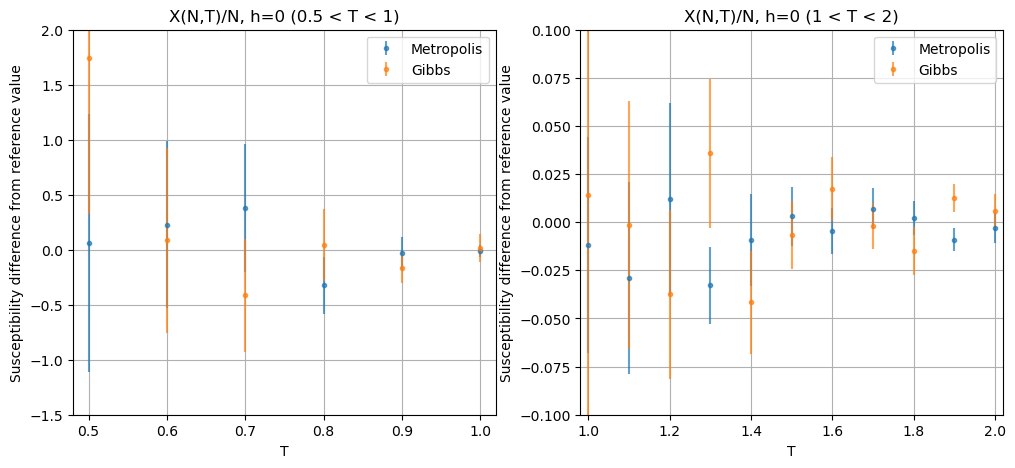

In [7]:
# Read the data from the file
data_x_m = np.loadtxt("final.chi.metro")
data_x_g = np.loadtxt("final.chi.gibbs")

# Extract the columns
temp_x_m  = data_x_m [:,0]
value_x_m  = data_x_m [:,1]
error_x_m  = data_x_m [:,2]
temp_x_g  = data_x_g [:,0]
value_x_g  = data_x_g [:,1]
error_x_g  = data_x_g [:,2]

# Define a function to subtract from the energy array
def susceptibility(temp):
    return np.exp(2*J/temp)*(1-thN(temp))/((1+thN(temp))*temp)

value_x_m_minus = value_x_m - susceptibility(temp_x_m)
value_x_g_minus = value_x_g - susceptibility(temp_x_g)

# Plot the energy as a function of temperature with error bars
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].errorbar(temp_x_m, value_x_m_minus, yerr=error_x_m, label="Metropolis", alpha=0.7, fmt = '.')
axs[0].errorbar(temp_x_g, value_x_g_minus, yerr=error_x_g, label="Gibbs", alpha=0.7, fmt = '.')
axs[0].set_xlabel("T")
axs[0].set_ylabel("Susceptibility difference from reference value")
axs[0].set_title("X(N,T)/N, h=0 (0.5 < T < 1)")
axs[0].set_ylim([-1.5, 2])
axs[0].grid(True)
axs[0].legend()

axs[1].errorbar(temp_x_m, value_x_m_minus, yerr=error_x_m, label="Metropolis", alpha=0.7, fmt = '.')
axs[1].errorbar(temp_x_g, value_x_g_minus, yerr=error_x_g, label="Gibbs", alpha=0.7, fmt = '.')
axs[1].set_xlabel("T")
axs[1].set_ylabel("Susceptibility difference from reference value")
axs[1].set_title("X(N,T)/N, h=0 (1 < T < 2)")
axs[1].set_ylim([-0.1, 0.1])
axs[1].grid(True)
axs[1].legend()

axs[0].set_xlim([0.48, 1.02])
axs[1].set_xlim([0.98, 2.02])


plt.show()

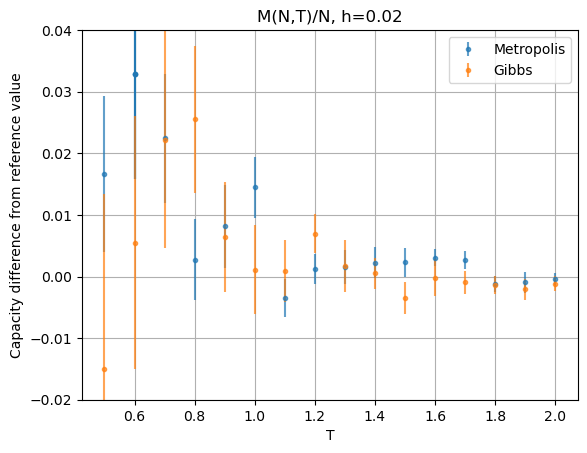

In [8]:
# Read the data from the file
data_m_m = np.loadtxt("final.mag.metro")
data_m_g = np.loadtxt("final.mag.gibbs")

# Extract the columns
temp_m_m  = data_m_m [:,0]
value_m_m  = data_m_m [:,1]
error_m_m  = data_m_m [:,2]
temp_m_g  = data_m_g [:,0]
value_m_g  = data_m_g [:,1]
error_m_g  = data_m_g [:,2]

# Define a function to subtract from the energy array
h = 0.02
def l1(temp):
    return np.exp(J/temp)*np.cosh(h/temp)+np.sqrt(np.exp(2*J/temp)*np.cosh(h/temp)*np.cosh(h/temp)-2*np.sinh(2*J/temp))

def l2(temp):
    return np.exp(J/temp)*np.cosh(h/temp)-np.sqrt(np.exp(2*J/temp)*np.cosh(h/temp)*np.cosh(h/temp)-2*np.sinh(2*J/temp))

def Z(temp):
    return l1(temp)**n + l2(temp)**n

def magnetization(temp):
    return (np.exp(J/temp)*np.sinh(h/temp)*((l1(temp)**(n-1))*(1+np.exp(J/temp)*np.cosh(h/temp)/np.sqrt(np.exp(2*J/temp)*np.cosh(h/temp)*np.cosh(h/temp)-2*np.sinh(2*J/temp))) + (l2(temp)**(n-1))*(1-np.exp(J/temp)*np.cosh(h/temp)/np.sqrt(np.exp(2*J/temp)*np.cosh(h/temp)*np.cosh(h/temp)-2*np.sinh(2*J/temp)))))/Z(temp)

value_m_m_minus = value_m_m - magnetization(temp_m_m)
value_m_g_minus = value_m_g - magnetization(temp_m_g)

# Plot the energy as a function of temperature with error bars
plt.errorbar(temp_m_m, value_m_m_minus, yerr=error_m_m, label="Metropolis", alpha=0.7, fmt = '.')
plt.errorbar(temp_m_g, value_m_g_minus, yerr=error_m_g, label="Gibbs", alpha=0.7, fmt = '.')

# Set the axis labels and title
plt.xlabel("T")
plt.ylabel("Capacity difference from reference value")
plt.legend()
plt.grid(True)
plt.title("M(N,T)/N, h=0.02")
ax = plt.gca()
ax.set_ylim([-0.02, 0.04])

# Show the plot
plt.show()

### Results
We used 20 blocks of 5000 steps each. Our results seem mostly compatible with the analytical solutions. A couple results seem too far out, but this is to be wìexpectd with so many points.